In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [3]:
import seaborn as sns
cmap =sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


C:\Users\AnitaSehnBrose\AppData\Local\Temp\ipykernel_17588\111525298.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap, axis=1)\


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],
                                                    df.iloc[:, -1],
                                                    test_size=0.16)

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
pred = logistic_regression.fit(X_train, y_train).predict(X_test)
logistic_acc = accuracy_score(y_test, pred)
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.9024390243902439


C:\Users\AnitaSehnBrose\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


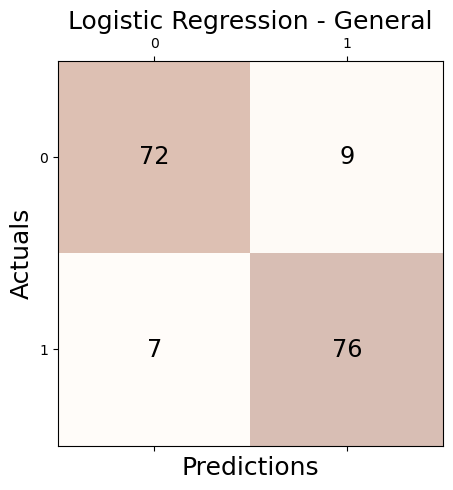

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, pred.round(0).astype(int))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression - General', fontsize=18)
plt.show()



In [7]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        81
           1       0.89      0.92      0.90        83

    accuracy                           0.90       164
   macro avg       0.90      0.90      0.90       164
weighted avg       0.90      0.90      0.90       164



In [8]:
wearable_df = df[['age', 'sex', 'trestbps', 'fbs', 'restecg', 'thalach',
                 'oldpeak', 'slope', 'target']]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(wearable_df.iloc[:, :-1],
                                                    wearable_df.iloc[:, -1],
                                                    test_size=0.3)
print(y_train.shape, X_train.shape, X_test.shape, y_test.shape)

(717,) (717, 8) (308, 8) (308,)


In [25]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
preds = logistic_regression.fit(X_train, y_train).predict(X_test)
logistic_acc = accuracy_score(y_test, preds)
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.75


C:\Users\AnitaSehnBrose\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
logistic_acc = accuracy_score(y_test, preds)
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.75


In [27]:
from sklearn.metrics import precision_score
logistic_precision = precision_score(y_test, 
                                     preds)
print('Logistic Precision: {}'.format(logistic_precision))

Logistic Precision: 0.7049180327868853


In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, preds)

array([[102,  54],
       [ 23, 129]], dtype=int64)

In [29]:
y_test

769    1
953    1
964    1
906    1
548    1
      ..
311    0
99     1
582    1
226    0
403    1
Name: target, Length: 308, dtype: int64

In [30]:
preds

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


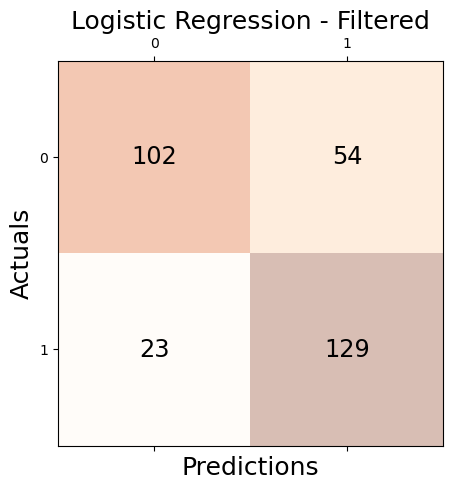

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test,preds.round(0).astype(int))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression - Filtered', fontsize=18)
plt.show()


In [18]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        81
           1       0.76      0.76      0.76        83

    accuracy                           0.76       164
   macro avg       0.76      0.76      0.76       164
weighted avg       0.76      0.76      0.76       164



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],
                                                    df.iloc[:, -1],
                                                    test_size=0.3)



In [44]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
preds = logistic_regression.fit(X_train, y_train).predict(X_test)
logistic_acc = accuracy_score(y_test, preds)
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.8214285714285714


C:\Users\AnitaSehnBrose\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
preds = logistic_regression.fit(X_train, y_train).predict(X_test)
logistic_acc = accuracy_score(y_test, preds)
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.8214285714285714


In [52]:
X_test

array([[0.31914894, 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.27659574, 1.        , 1.        , ..., 1.        , 0.5       ,
        0.66666667],
       [0.57446809, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       ...,
       [0.68085106, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.25531915, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.68085106, 1.        , 0.        , ..., 1.        , 0.25      ,
        1.        ]])

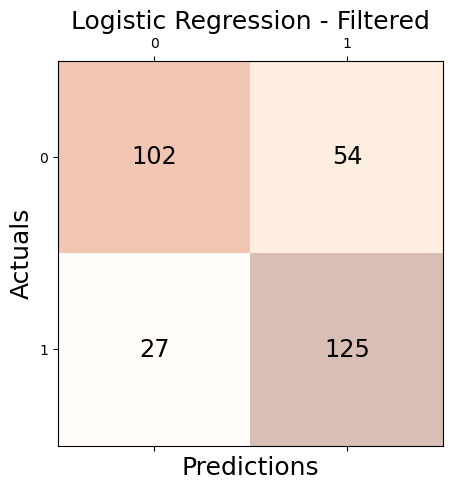

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test,preds.round(0).astype(int))
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Logistic Regression - Filtered', fontsize=18)
plt.show()
